In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone
# %matplotlib inline

import pandas as pd


In [3]:
file_path="/content/drive/MyDrive/Article_EV/df_merged.csv"

df=pd.read_csv(file_path)
df.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID_x,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,userID_y
0,5e225f9ff9af8b5c26d21718,39,"Thu, 02 Jan 2020 01:12:29 GMT","Thu, 02 Jan 2020 04:38:39 GMT","Thu, 02 Jan 2020 03:11:48 GMT",8.336,2_39_126_20_2020-01-02 01:12:28.778216,2,CA-310,2-39-126-20,America/Los_Angeles,1099.0,400.0,24.0,60.0,125.0,"Thu, 02 Jan 2020 01:13:30 GMT",True,"Thu, 02 Jan 2020 03:17:29 GMT",1099.0
1,5e225f9ff9af8b5c26d21719,39,"Thu, 02 Jan 2020 04:18:06 GMT","Fri, 03 Jan 2020 00:06:13 GMT","Thu, 02 Jan 2020 06:41:48 GMT",14.731,2_39_79_382_2020-01-02 04:18:06.407434,2,CA-491,2-39-79-382,America/Los_Angeles,3267.0,400.0,40.0,100.0,583.0,"Thu, 02 Jan 2020 04:18:39 GMT",True,"Thu, 02 Jan 2020 14:01:06 GMT",3267.0
2,5e23b122f9af8b5fe4b973bf,39,"Thu, 02 Jan 2020 16:05:15 GMT","Fri, 03 Jan 2020 00:11:51 GMT","Thu, 02 Jan 2020 16:39:20 GMT",2.083,2_39_79_380_2020-01-02 16:05:14.818106,2,CA-489,2-39-79-380,America/Los_Angeles,751.0,400.0,8.0,20.0,590.0,"Thu, 02 Jan 2020 16:05:35 GMT",True,"Fri, 03 Jan 2020 01:55:15 GMT",751.0
3,5e23b122f9af8b5fe4b973c0,39,"Thu, 02 Jan 2020 16:06:34 GMT","Thu, 02 Jan 2020 17:04:02 GMT","Thu, 02 Jan 2020 16:37:26 GMT",0.855,2_39_79_383_2020-01-02 16:06:34.210024,2,CA-492,2-39-79-383,America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e23b122f9af8b5fe4b973c1,39,"Thu, 02 Jan 2020 16:31:35 GMT","Fri, 03 Jan 2020 00:29:28 GMT","Fri, 03 Jan 2020 00:29:26 GMT",50.788,2_39_78_366_2020-01-02 16:31:34.854057,2,CA-323,2-39-78-366,America/Los_Angeles,3853.0,360.0,64.8,180.0,603.0,"Thu, 02 Jan 2020 16:31:59 GMT",True,"Fri, 03 Jan 2020 02:34:35 GMT",3853.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id                 5506 non-null   object 
 1   clusterID           5506 non-null   int64  
 2   connectionTime      5506 non-null   object 
 3   disconnectTime      5506 non-null   object 
 4   doneChargingTime    3925 non-null   object 
 5   kWhDelivered        5506 non-null   float64
 6   sessionID           5506 non-null   object 
 7   siteID              5506 non-null   int64  
 8   spaceID             5506 non-null   object 
 9   stationID           5506 non-null   object 
 10  timezone            5506 non-null   object 
 11  userID_x            4815 non-null   float64
 12  WhPerMile           4884 non-null   float64
 13  kWhRequested        4884 non-null   float64
 14  milesRequested      4884 non-null   float64
 15  minutesAvailable    4884 non-null   float64
 16  modifi

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID_x,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,userID_y
0,5e225f9ff9af8b5c26d21718,39,"Thu, 02 Jan 2020 01:12:29 GMT","Thu, 02 Jan 2020 04:38:39 GMT","Thu, 02 Jan 2020 03:11:48 GMT",8.336,2_39_126_20_2020-01-02 01:12:28.778216,2,CA-310,2-39-126-20,America/Los_Angeles,1099.0,400.0,24.0,60.0,125.0,"Thu, 02 Jan 2020 01:13:30 GMT",True,"Thu, 02 Jan 2020 03:17:29 GMT",1099.0
1,5e225f9ff9af8b5c26d21719,39,"Thu, 02 Jan 2020 04:18:06 GMT","Fri, 03 Jan 2020 00:06:13 GMT","Thu, 02 Jan 2020 06:41:48 GMT",14.731,2_39_79_382_2020-01-02 04:18:06.407434,2,CA-491,2-39-79-382,America/Los_Angeles,3267.0,400.0,40.0,100.0,583.0,"Thu, 02 Jan 2020 04:18:39 GMT",True,"Thu, 02 Jan 2020 14:01:06 GMT",3267.0
2,5e23b122f9af8b5fe4b973bf,39,"Thu, 02 Jan 2020 16:05:15 GMT","Fri, 03 Jan 2020 00:11:51 GMT","Thu, 02 Jan 2020 16:39:20 GMT",2.083,2_39_79_380_2020-01-02 16:05:14.818106,2,CA-489,2-39-79-380,America/Los_Angeles,751.0,400.0,8.0,20.0,590.0,"Thu, 02 Jan 2020 16:05:35 GMT",True,"Fri, 03 Jan 2020 01:55:15 GMT",751.0
3,5e23b122f9af8b5fe4b973c0,39,"Thu, 02 Jan 2020 16:06:34 GMT","Thu, 02 Jan 2020 17:04:02 GMT","Thu, 02 Jan 2020 16:37:26 GMT",0.855,2_39_79_383_2020-01-02 16:06:34.210024,2,CA-492,2-39-79-383,America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e23b122f9af8b5fe4b973c1,39,"Thu, 02 Jan 2020 16:31:35 GMT","Fri, 03 Jan 2020 00:29:28 GMT","Fri, 03 Jan 2020 00:29:26 GMT",50.788,2_39_78_366_2020-01-02 16:31:34.854057,2,CA-323,2-39-78-366,America/Los_Angeles,3853.0,360.0,64.8,180.0,603.0,"Thu, 02 Jan 2020 16:31:59 GMT",True,"Fri, 03 Jan 2020 02:34:35 GMT",3853.0


In [6]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

##################### Shape #####################
(5506, 20)
##################### Types #####################
_id                    object
clusterID               int64
connectionTime         object
disconnectTime         object
doneChargingTime       object
kWhDelivered          float64
sessionID              object
siteID                  int64
spaceID                object
stationID              object
timezone               object
userID_x              float64
WhPerMile             float64
kWhRequested          float64
milesRequested        float64
minutesAvailable      float64
modifiedAt             object
paymentRequired        object
requestedDeparture     object
userID_y              float64
dtype: object
##################### Head #####################
                        _id  clusterID                 connectionTime                 disconnectTime               doneChargingTime  kWhDelivered                               sessionID  siteID spaceID    stationID            

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
cat_summary(df, "paymentRequired")

                 paymentRequired      Ratio
paymentRequired                            
True                        4884  88.703233
##########################################


In [ ]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

In [ ]:
num_summary(df, "kWhDelivered")

count    5506.000000
mean       10.497960
std        11.513732
min         0.501000
5%          0.847250
10%         0.911000
20%         2.057000
30%         3.469500
40%         4.946000
50%         6.281000
60%         8.444000
70%        11.765500
80%        15.827000
90%        27.229000
95%        36.424500
99%        52.454450
max        77.700000
Name: kWhDelivered, dtype: float64


In [ ]:
df.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID_x,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,userID_y
0,5e225f9ff9af8b5c26d21718,39,"Thu, 02 Jan 2020 01:12:29 GMT","Thu, 02 Jan 2020 04:38:39 GMT","Thu, 02 Jan 2020 03:11:48 GMT",8.336,2_39_126_20_2020-01-02 01:12:28.778216,2,CA-310,2-39-126-20,America/Los_Angeles,1099.0,400.0,24.0,60.0,125.0,"Thu, 02 Jan 2020 01:13:30 GMT",True,"Thu, 02 Jan 2020 03:17:29 GMT",1099.0
1,5e225f9ff9af8b5c26d21719,39,"Thu, 02 Jan 2020 04:18:06 GMT","Fri, 03 Jan 2020 00:06:13 GMT","Thu, 02 Jan 2020 06:41:48 GMT",14.731,2_39_79_382_2020-01-02 04:18:06.407434,2,CA-491,2-39-79-382,America/Los_Angeles,3267.0,400.0,40.0,100.0,583.0,"Thu, 02 Jan 2020 04:18:39 GMT",True,"Thu, 02 Jan 2020 14:01:06 GMT",3267.0
2,5e23b122f9af8b5fe4b973bf,39,"Thu, 02 Jan 2020 16:05:15 GMT","Fri, 03 Jan 2020 00:11:51 GMT","Thu, 02 Jan 2020 16:39:20 GMT",2.083,2_39_79_380_2020-01-02 16:05:14.818106,2,CA-489,2-39-79-380,America/Los_Angeles,751.0,400.0,8.0,20.0,590.0,"Thu, 02 Jan 2020 16:05:35 GMT",True,"Fri, 03 Jan 2020 01:55:15 GMT",751.0
3,5e23b122f9af8b5fe4b973c0,39,"Thu, 02 Jan 2020 16:06:34 GMT","Thu, 02 Jan 2020 17:04:02 GMT","Thu, 02 Jan 2020 16:37:26 GMT",0.855,2_39_79_383_2020-01-02 16:06:34.210024,2,CA-492,2-39-79-383,America/Los_Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5e23b122f9af8b5fe4b973c1,39,"Thu, 02 Jan 2020 16:31:35 GMT","Fri, 03 Jan 2020 00:29:28 GMT","Fri, 03 Jan 2020 00:29:26 GMT",50.788,2_39_78_366_2020-01-02 16:31:34.854057,2,CA-323,2-39-78-366,America/Los_Angeles,3853.0,360.0,64.8,180.0,603.0,"Thu, 02 Jan 2020 16:31:59 GMT",True,"Fri, 03 Jan 2020 02:34:35 GMT",3853.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id                 5506 non-null   object 
 1   clusterID           5506 non-null   int64  
 2   connectionTime      5506 non-null   object 
 3   disconnectTime      5506 non-null   object 
 4   doneChargingTime    3925 non-null   object 
 5   kWhDelivered        5506 non-null   float64
 6   sessionID           5506 non-null   object 
 7   siteID              5506 non-null   int64  
 8   spaceID             5506 non-null   object 
 9   stationID           5506 non-null   object 
 10  timezone            5506 non-null   object 
 11  userID_x            4815 non-null   float64
 12  WhPerMile           4884 non-null   float64
 13  kWhRequested        4884 non-null   float64
 14  milesRequested      4884 non-null   float64
 15  minutesAvailable    4884 non-null   float64
 16  modifi

In [8]:
df.drop(['doneChargingTime', "_id", "clusterID", "sessionID","siteID", "spaceID","stationID", "timezone", "userID_x", "modifiedAt","requestedDeparture", "paymentRequired", "userID_y"], axis=1, inplace=True)

In [9]:
df.head()

,connectionTime,disconnectTime,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable
0,"Thu, 02 Jan 2020 01:12:29 GMT","Thu, 02 Jan 2020 04:38:39 GMT",8.336,400.0,24.0,60.0,125.0
1,"Thu, 02 Jan 2020 04:18:06 GMT","Fri, 03 Jan 2020 00:06:13 GMT",14.731,400.0,40.0,100.0,583.0
2,"Thu, 02 Jan 2020 16:05:15 GMT","Fri, 03 Jan 2020 00:11:51 GMT",2.083,400.0,8.0,20.0,590.0
3,"Thu, 02 Jan 2020 16:06:34 GMT","Thu, 02 Jan 2020 17:04:02 GMT",0.855,NaN,NaN,NaN,NaN
4,"Thu, 02 Jan 2020 16:31:35 GMT","Fri, 03 Jan 2020 00:29:28 GMT",50.788,360.0,64.8,180.0,603.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   connectionTime    5506 non-null   object 
 1   disconnectTime    5506 non-null   object 
 2   kWhDelivered      5506 non-null   float64
 3   WhPerMile         4884 non-null   float64
 4   kWhRequested      4884 non-null   float64
 5   milesRequested    4884 non-null   float64
 6   minutesAvailable  4884 non-null   float64
dtypes: float64(5), object(2)
memory usage: 301.2+ KB


In [11]:
df.isnull().sum()

,0
connectionTime,0
disconnectTime,0
kWhDelivered,0
WhPerMile,622
kWhRequested,622
milesRequested,622
minutesAvailable,622


In [12]:
# prompt: missing value olan satırları silme

# Drop rows with any missing values
df.dropna(inplace=True)

# Alternatively, drop rows with missing values in specific columns:
# df.dropna(subset=['column1', 'column2'], inplace=True)

# Check the number of missing values after dropping rows
df.isnull().sum()

,0
connectionTime,0
disconnectTime,0
kWhDelivered,0
WhPerMile,0
kWhRequested,0
milesRequested,0
minutesAvailable,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4884 entries, 0 to 5505
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   connectionTime    4884 non-null   object 
 1   disconnectTime    4884 non-null   object 
 2   kWhDelivered      4884 non-null   float64
 3   WhPerMile         4884 non-null   float64
 4   kWhRequested      4884 non-null   float64
 5   milesRequested    4884 non-null   float64
 6   minutesAvailable  4884 non-null   float64
dtypes: float64(5), object(2)
memory usage: 305.2+ KB


In [14]:
cols=["kWhDelivered","WhPerMile", "kWhRequested", "milesRequested", "minutesAvailable"]

In [ ]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

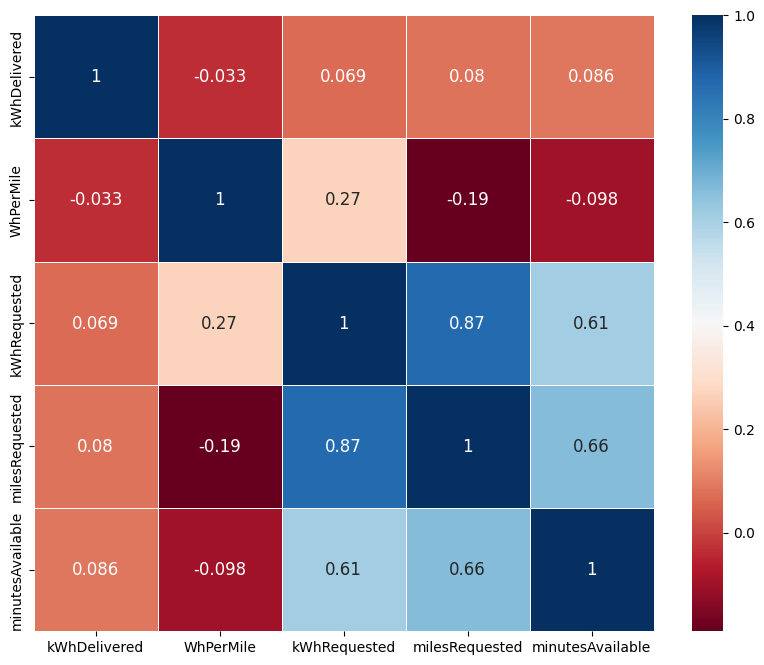

In [ ]:
correlation_matrix(df, cols)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 2, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           3,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,557 (13.89 KB)

 Trainable params: 3,557 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

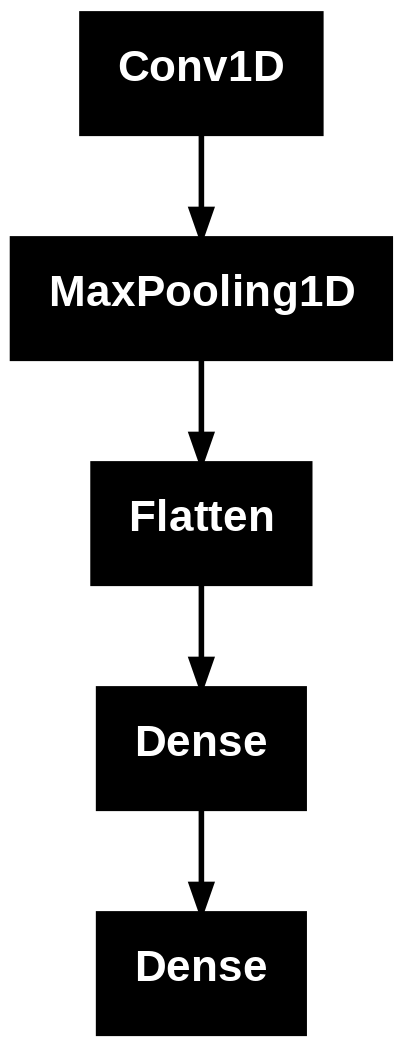

In [16]:
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is your DataFrame and it has been preprocessed as shown in the provided code

# Feature selection
X = df[['WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable']]
y = df['kWhDelivered']

# Convert categorical features to numerical using one-hot encoding if necessary
# ... (Your existing code for one-hot encoding or other preprocessing if needed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Reshape input data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1)) # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse')

model.summary()

plot_model(model)

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df is your DataFrame and it has been preprocessed as shown in the provided code

# Feature selection
X = df[['WhPerMile', 'kWhRequested', 'milesRequested', 'minutesAvailable']]
y = df['kWhDelivered']

# Convert categorical features to numerical using one-hot encoding if necessary
# ... (Your existing code for one-hot encoding or other preprocessing if needed)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Reshape input data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1)) # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse')

model.summary()

plot_model(model)


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate SMAPE
def smape(y_true, y_pred, epsilon=1e-6):
    y_pred = y_pred.ravel()  # Flatten y_pred to 1D
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon  # Payda sıfıra yaklaştığında hata önlemek için epsilon eklenir
    diff = (np.abs(y_true - y_pred)) / denominator
    return (100-(100 * np.mean(diff)))

smape_val = smape(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')
print(f'SMAPE: {smape_val}')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 242.3897 - val_loss: 136.5854
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134.2318 - val_loss: 129.5546
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 135.0941 - val_loss: 128.3164
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 128.3445 - val_loss: 127.7927
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 142.9069 - val_loss: 127.9465
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 136.9341 - val_loss: 128.1644
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 131.7988 - val_loss: 128.0110
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 136.8805 - val_loss: 128.0227
Epoch 9/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 143.9705 - val_loss: 129.2726
Epoch 10/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 137.5749 - val_loss: 128.2404
Epoch 11/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 135.8936 - val_loss: 129.3562
Epoch 12/50
110/110

In [ ]:
df_lstm=df.copy()
# connectionTime'ı datetime türüne çevirip sıralayalım
df_lstm['connectionTime'] = pd.to_datetime(df_lstm['connectionTime'])
df_lstm.sort_values(by='connectionTime', inplace=True)

# Hedef sütun olarak kWhDelivered (zaman serisine dair eksik değerleri atıyoruz)
df_lstm = df_lstm.dropna(subset=['kWhDelivered'])

# Örnek olarak bu çalışmada SIRF kWhDelivered zaman serisini kullanacağız (univariate).
# Eğer birden fazla özelliği (feature) kullanacaksanız, X'e ek sütunlar ekleyebilirsiniz.
df_lstm.set_index('connectionTime', inplace=True)  # zaman serisi analizi için index'e alıyoruz
series = df_lstm['kWhDelivered'].values.reshape(-1, 1)

# İsteğe göre veriyi MinMaxScaler ile [0,1] arasına ölçekleyelim (LSTM genelde ölçekli veride daha stabil çalışır)
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)


In [ ]:
def create_sequences(data, look_back=10):
    """
    data: ölçeklenmiş zaman serisi veya çok değişkenli dizi (shape: (num_samples, num_features))
    look_back: kaç zaman adımı geriye bakılacak (sequence length)

    return: X, y
      - X.shape = (#örnek, look_back, #features)
      - y.shape = (#örnek,)
    """
    X, y = [], []
    for i in range(len(data) - look_back):
        seq = data[i : i + look_back]     # look_back uzunluğunda pencere
        target = data[i + look_back, 0]  # örnek olarak 0. sütunu (kWhDelivered) hedef alıyoruz
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

# Bir örnek look_back belirleyelim
look_back = 10
X_all, y_all = create_sequences(series_scaled, look_back=look_back)

# Elde ettiğimiz X_all şekli: (örnek_sayısı, look_back, 1)   tek değişkenli
# y_all şekli: (örnek_sayısı,)
print("X_all shape:", X_all.shape)
print("y_all shape:", y_all.shape)


X_all shape: (4874, 10, 1)
y_all shape: (4874,)


In [ ]:
train_size = int(len(X_all) * 0.8)
X_train, X_test = X_all[:train_size], X_all[train_size:]
y_train, y_test = y_all[:train_size], y_all[train_size:]

print("Train set boyutu:", X_train.shape, y_train.shape)
print("Test set boyutu :", X_test.shape,  y_test.shape)


Train set boyutu: (3899, 10, 1) (3899,)
Test set boyutu : (975, 10, 1) (975,)


In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout  # Import Dropout
from tensorflow.keras.optimizers import Adam
# LSTM modelini oluşturalım
model = Sequential()
model.add(
    LSTM(
        units=64,
        return_sequences=False,         # Tek LSTM katmanı kullanacağız, isterseniz True yapıp 2. LSTM katmanı ekleyebilirsiniz
        input_shape=(look_back, 1)      # (zaman_adımı, özellik_sayısı) -> univariate örnekte (10,1)
    )
)
model.add(Dropout(0.2))  # Overfitting'i azaltmak için dropout

model.add(Dense(1, activation='linear'))  # Regresyon çıktısı (kWhDelivered)

# Modeli derleyelim
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Eğitimi başlatalım
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.2,   # eğitim verisinin %20'sini validasyon olarak ayır
    shuffle=False           # zaman serisi olduğu için genelde shuffle=False önerilir
)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Modelin tahminleri
y_pred_scaled = model.predict(X_test)

# Ölçeklenmiş tahminleri orijinal ölçeğe dönüştürme
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))  # y_test'i de dönüştür

# RMSE hesaplama
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

# MAE hesaplama
mae = mean_absolute_error(y_test_original, y_pred)

# R-squared hesaplama
r2 = r2_score(y_test_original, y_pred)

# SMAPE hesaplama
def smape(y_true, y_pred, epsilon=1e-6):
    y_pred = y_pred.ravel()  # Flatten y_pred to 1D
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon  # Payda sıfıra yaklaştığında hata önlemek için epsilon eklenir
    diff = (np.abs(y_true - y_pred)) / denominator
    return (100-(100 * np.mean(diff)))

smape_val = smape(y_test_original, y_pred)


print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print(f"SMAPE: {smape_val}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0133 - val_loss: 0.0276
Epoch 2/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0139 - val_loss: 0.0271
Epoch 3/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0137 - val_loss: 0.0272
Epoch 4/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0137 - val_loss: 0.0272
Epoch 5/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0137 - val_loss: 0.0274
Epoch 6/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0139 - val_loss: 0.0273
Epoch 7/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0140 - val_loss: 0.0273
Epoch 8/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0140 - val_loss: 0.0271
Epoch 9/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0139 - val_loss: 0.0272
Epoch 10/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0140 - val_loss: 0.0271
Epoch 11/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0140 - val_loss: 0.0271
Epoch 12/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0

In [ ]:
# Convert 'Charging Start Time' column to datetime objects for easier manipulation

df["connectionTime"] = pd.to_datetime(df["connectionTime"])

In [ ]:
# Convert 'Charging End Time' column to datetime objects

df["disconnectTime"] = pd.to_datetime(df["disconnectTime"])

In [ ]:
df.head()

,connectionTime,disconnectTime,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable
0,2020-01-02 01:12:29,2020-01-02 04:38:39,8.336,400.0,24.0,60.0,125.0
1,2020-01-02 04:18:06,2020-01-03 00:06:13,14.731,400.0,40.0,100.0,583.0
2,2020-01-02 16:05:15,2020-01-03 00:11:51,2.083,400.0,8.0,20.0,590.0
4,2020-01-02 16:31:35,2020-01-03 00:29:28,50.788,360.0,64.8,180.0,603.0
5,2020-01-02 17:25:53,2020-01-03 02:14:55,4.187,400.0,12.0,30.0,421.0


In [ ]:
from datetime import datetime
df["connectionTime"] = pd.to_datetime(df["connectionTime"])
df["disconnectTime"] = pd.to_datetime(df["disconnectTime"])
df["Hour"] = df["connectionTime"].dt.hour
df["Month"] = df["connectionTime"].dt.month
df["Year"] = df["connectionTime"].dt.year
df["ChargingDuration"] = (
    df["disconnectTime"] - df["connectionTime"]
).dt.total_seconds() / 3600
df["ChargingRate(kW)"] = df["kWhDelivered"] / df["ChargingDuration"]
df["Duration_Hour"] = df["ChargingDuration"] * df["Hour"]
df["Duration_Rate"] = df["ChargingDuration"] * df["ChargingRate(kW)"]
df["Hour_Rate"] = df["Hour"] * df["ChargingRate(kW)"]

In [ ]:
df.head()

,connectionTime,disconnectTime,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable,Hour,Month,Year,ChargingDuration,ChargingRate(kW),Duration_Hour,Duration_Rate,Hour_Rate
0,2020-01-02 01:12:29,2020-01-02 04:38:39,8.336,400.0,24.0,60.0,125.0,1,1,2020,3.436111,2.425998,3.436111,8.336,2.425998
1,2020-01-02 04:18:06,2020-01-03 00:06:13,14.731,400.0,40.0,100.0,583.0,4,1,2020,19.801944,0.743917,79.207778,14.731,2.975667
2,2020-01-02 16:05:15,2020-01-03 00:11:51,2.083,400.0,8.0,20.0,590.0,16,1,2020,8.110000,0.256843,129.760000,2.083,4.109494
4,2020-01-02 16:31:35,2020-01-03 00:29:28,50.788,360.0,64.8,180.0,603.0,16,1,2020,7.964722,6.376619,127.435556,50.788,102.025906
5,2020-01-02 17:25:53,2020-01-03 02:14:55,4.187,400.0,12.0,30.0,421.0,17,1,2020,8.817222,0.474866,149.892778,4.187,8.072724


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   connectionTime    5506 non-null   datetime64[ns]
 1   disconnectTime    5506 non-null   datetime64[ns]
 2   kWhDelivered      5506 non-null   float64       
 3   WhPerMile         5506 non-null   float64       
 4   kWhRequested      5506 non-null   float64       
 5   milesRequested    5506 non-null   float64       
 6   minutesAvailable  5506 non-null   float64       
 7   paymentRequired   4884 non-null   object        
 8   Hour              5506 non-null   int32         
 9   Month             5506 non-null   int32         
 10  Year              5506 non-null   int32         
 11  ChargingDuration  5506 non-null   float64       
 12  ChargingRate(kW)  5506 non-null   float64       
 13  Duration_Hour     5506 non-null   float64       
 14  Duration_Rate     5506 n

In [ ]:
df.head()

,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable,Hour,Month,Year,ChargingDuration,ChargingRate(kW),Duration_Hour,Duration_Rate,Hour_Rate
0,8.336,400.0,24.0,60.0,125.0,1,1,2020,3.436111,2.425998,3.436111,8.336,2.425998
1,14.731,400.0,40.0,100.0,583.0,4,1,2020,19.801944,0.743917,79.207778,14.731,2.975667
2,2.083,400.0,8.0,20.0,590.0,16,1,2020,8.110000,0.256843,129.760000,2.083,4.109494
3,0.855,0.0,0.0,0.0,0.0,16,1,2020,0.957778,0.892691,15.324444,0.855,14.283063
4,50.788,360.0,64.8,180.0,603.0,16,1,2020,7.964722,6.376619,127.435556,50.788,102.025906


In [ ]:
df.drop("Duration_Rate", axis=1, inplace=True)

In [ ]:
df.head()

,connectionTime,disconnectTime,kWhDelivered,WhPerMile,kWhRequested,milesRequested,minutesAvailable,Hour,Month,Year,ChargingDuration,ChargingRate(kW),Duration_Hour,Hour_Rate
0,2020-01-02 01:12:29,2020-01-02 04:38:39,8.336,400.0,24.0,60.0,125.0,1,1,2020,3.436111,2.425998,3.436111,2.425998
1,2020-01-02 04:18:06,2020-01-03 00:06:13,14.731,400.0,40.0,100.0,583.0,4,1,2020,19.801944,0.743917,79.207778,2.975667
2,2020-01-02 16:05:15,2020-01-03 00:11:51,2.083,400.0,8.0,20.0,590.0,16,1,2020,8.110000,0.256843,129.760000,4.109494
4,2020-01-02 16:31:35,2020-01-03 00:29:28,50.788,360.0,64.8,180.0,603.0,16,1,2020,7.964722,6.376619,127.435556,102.025906
5,2020-01-02 17:25:53,2020-01-03 02:14:55,4.187,400.0,12.0,30.0,421.0,17,1,2020,8.817222,0.474866,149.892778,8.072724


In [ ]:
df.drop(["connectionTime", "disconnectTime","milesRequested"], axis=1, inplace=True)

In [ ]:
#Python OOP yapısı kullanılmıştır.


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor


from sklearn import metrics,preprocessing, model_selection
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,ShuffleSplit,GridSearchCV,RandomizedSearchCV
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

class RegressionModel:
    def __init__(self, X,y):
        self.X=X
        self.y=y
        self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.y,test_size=0.33,random_state=42)


    def LinearRegression(self):
        print("*********Linear Regression*********")
        linear_model = LinearRegression()
        linear_model.fit(self.X_train, self.y_train)
        y_pred = linear_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)

        # The smape function should be defined outside the LinearRegression method
        def smape(y_true, y_pred, epsilon=1e-6):
            y_pred = y_pred.ravel()  # Flatten y_pred to 1D
            denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon  # Payda sıfıra yaklaştığında hata önlemek için epsilon eklenir
            diff = (np.abs(y_true - y_pred)) / denominator
            return (100-(100 * np.mean(diff)))

        print(smape(self.y_test, y_pred))


    def RidgeRegression(self):
        print("*********Ridge Regression*********")
        ridge_model = Ridge()
        ridge_model.fit(self.X_train, self.y_train)
        y_pred = ridge_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)
                def smape(y_true, y_pred, epsilon=1e-6):
           y_pred = y_pred.ravel()  # Flatten y_pred to 1D
           denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon  # Payda sıfıra yaklaştığında hata önlemek için epsilon eklenir
           diff = (np.abs(y_true - y_pred)) / denominator
           return (100-(100 * np.mean(diff)))
        print(smape(self.y_test, y_pred))



    def LassoRegression(self):
        print("*********Lasso Regression*********")
        lasso_model = Lasso()
        lasso_model.fit(self.X_train, self.y_train)
        y_pred = lasso_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)
                def smape(y_true, y_pred, epsilon=1e-6):
           y_pred = y_pred.ravel()  # Flatten y_pred to 1D
           denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon  # Payda sıfıra yaklaştığında hata önlemek için epsilon eklenir
           diff = (np.abs(y_true - y_pred)) / denominator
           return (100-(100 * np.mean(diff)))
        print(smape(self.y_test, y_pred))



    def SVMRegression(self):
        print("*********Support Vector Regression*********")
        svmreg_model = SVR()
        svmreg_model.fit(self.X_train, self.y_train)
        y_pred = svmreg_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)
                def smape(y_true, y_pred, epsilon=1e-6):
           y_pred = y_pred.ravel()  # Flatten y_pred to 1D
           denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon  # Payda sıfıra yaklaştığında hata önlemek için epsilon eklenir
           diff = (np.abs(y_true - y_pred)) / denominator
           return (100-(100 * np.mean(diff)))
        print(smape(self.y_test, y_pred))


    def KNNRegression(self):
        print("*********KNN Regression*********")
        KNNreg=KNeighborsRegressor()
        KNNreg.fit(self.X_train, self.y_train)
        y_pred = KNNreg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)
        def smape(y_true, y_pred, epsilon=1e-6):
           y_pred = y_pred.ravel()  # Flatten y_pred to 1D
           denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon  # Payda sıfıra yaklaştığında hata önlemek için epsilon eklenir
           diff = (np.abs(y_true - y_pred)) / denominator
           return (100-(100 * np.mean(diff)))
        print(smape(self.y_test, y_pred))


    def DecisionTreeRegression(self):
        print("*********Decision Tree Regression*********")
        dtree_model = DecisionTreeRegressor()
        dtree_model.fit(self.X_train, self.y_train)
        y_pred = dtree_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)
        def smape(y_true, y_pred, epsilon=1e-6):
           y_pred = y_pred.ravel()  # Flatten y_pred to 1D
           denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon  # Payda sıfıra yaklaştığında hata önlemek için epsilon eklenir
           diff = (np.abs(y_true - y_pred)) / denominator
           return (100-(100 * np.mean(diff)))
        print(smape(self.y_test, y_pred))


    def RandomForestRegressor(self):
        print("**** Random Forest Regression")
        rfr_model = RandomForestRegressor()
        rfr_model.fit(self.X_train, self.y_train)
        y_pred = rfr_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)
        def smape(y_true, y_pred, epsilon=1e-6):
           y_pred = y_pred.ravel()  # Flatten y_pred to 1D
           denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon  # Payda sıfıra yaklaştığında hata önlemek için epsilon eklenir
           diff = (np.abs(y_true - y_pred)) / denominator
           return (100-(100 * np.mean(diff)))
        print(smape(self.y_test, y_pred))


    def XGBRegression(self):
        print("**********XGBOOST Regression*********")
        xgb_reg=XGBRegressor()
        xgb_reg.fit(self.X_train, self.y_train)
        y_pred = xgb_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)
        def smape(y_true, y_pred, epsilon=1e-6):
           y_pred = y_pred.ravel()  # Flatten y_pred to 1D
           denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon  # Payda sıfıra yaklaştığında hata önlemek için epsilon eklenir
           diff = (np.abs(y_true - y_pred)) / denominator
           return (100-(100 * np.mean(diff)))
        print(smape(self.y_test, y_pred))


    def GBMRegressor(self):
        print("**********GBM Regression*********")
        gb_reg = GradientBoostingRegressor()
        gb_reg.fit(self.X_train, self.y_train)
        y_pred = gb_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)
        def smape(y_true, y_pred, epsilon=1e-6):
           y_pred = y_pred.ravel()  # Flatten y_pred to 1D
           denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon  # Payda sıfıra yaklaştığında hata önlemek için epsilon eklenir
           diff = (np.abs(y_true - y_pred)) / denominator
           return (100-(100 * np.mean(diff)))
        print(smape(self.y_test, y_pred))


    def LightGBMRegressor(self):
        print("**********LGBM Regression*********")
        lgb_reg=LGBMRegressor()
        lgb_reg.fit(self.X_train, self.y_train)
        y_pred = lgb_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)
        def smape(y_true, y_pred, epsilon=1e-6):
           y_pred = y_pred.ravel()  # Flatten y_pred to 1D
           denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon  # Payda sıfıra yaklaştığında hata önlemek için epsilon eklenir
           diff = (np.abs(y_true - y_pred)) / denominator
           return (100-(100 * np.mean(diff)))
        print(smape(self.y_test, y_pred))


    def MLPCRegressor(self):
        print("**********MLPC Regression*********")
        mlp_reg = MLPRegressor()
        mlp_reg.fit(self.X_train, self.y_train)
        y_pred = mlp_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print('MSE:', mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print('MAE:', mae)
        rmse = math.sqrt(mse)
        print('RMSE:', rmse)
        r2 = r2_score(self.y_test, y_pred)
        print('R-squared:', r2)
        def smape(y_true, y_pred, epsilon=1e-6):
           y_pred = y_pred.ravel()  # Flatten y_pred to 1D
           denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon  # Payda sıfıra yaklaştığında hata önlemek için epsilon eklenir
           diff = (np.abs(y_true - y_pred)) / denominator
           return (100-(100 * np.mean(diff)))
        print(smape(self.y_test, y_pred))











IndentationError: unindent does not match any outer indentation level (<tokenize>, line 68)

In [ ]:
!pip install lightgbm
!pip install xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math


# Define the smape function outside the class
def smape(y_true, y_pred, epsilon=1e-6):
    y_pred = y_pred.ravel()  # Flatten y_pred to 1D
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon
    diff = (np.abs(y_true - y_pred)) / denominator
    return 100 - (100 * np.mean(diff))


class RegressionModel:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.33, random_state=42
        )

    def LinearRegression(self):
        print("*********Linear Regression*********")
        linear_model = LinearRegression()
        linear_model.fit(self.X_train, self.y_train)
        y_pred = linear_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print("MSE:", mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print("MAE:", mae)
        rmse = math.sqrt(mse)
        print("RMSE:", rmse)
        r2 = r2_score(self.y_test, y_pred)
        print("R-squared:", r2)
        print("SMAPE:", smape(self.y_test, y_pred))  # Call the external smape function

    def RidgeRegression(self):
        print("*********Ridge Regression*********")
        ridge_model = Ridge()
        ridge_model.fit(self.X_train, self.y_train)
        y_pred = ridge_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print("MSE:", mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print("MAE:", mae)
        rmse = math.sqrt(mse)
        print("RMSE:", rmse)
        r2 = r2_score(self.y_test, y_pred)
        print("R-squared:", r2)
        print("SMAPE:", smape(self.y_test, y_pred))  # Call the external smape function

    def LassoRegression(self):
        print("*********Lasso Regression*********")
        lasso_model = Lasso()
        lasso_model.fit(self.X_train, self.y_train)
        y_pred = lasso_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print("MSE:", mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print("MAE:", mae)
        rmse = math.sqrt(mse)
        print("RMSE:", rmse)
        r2 = r2_score(self.y_test, y_pred)
        print("R-squared:", r2)
        print("SMAPE:", smape(self.y_test, y_pred))  # Call the external smape function

    def SVMRegression(self):
        print("*********Support Vector Regression*********")
        svmreg_model = SVR()
        svmreg_model.fit(self.X_train, self.y_train)
        y_pred = svmreg_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print("MSE:", mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print("MAE:", mae)
        rmse = math.sqrt(mse)
        print("RMSE:", rmse)
        r2 = r2_score(self.y_test, y_pred)
        print("R-squared:", r2)
        print("SMAPE:", smape(self.y_test, y_pred))  # Call the external smape function

    def KNNRegression(self):
        print("*********KNN Regression*********")
        KNNreg = KNeighborsRegressor()
        KNNreg.fit(self.X_train, self.y_train)
        y_pred = KNNreg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print("MSE:", mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print("MAE:", mae)
        rmse = math.sqrt(mse)
        print("RMSE:", rmse)
        r2 = r2_score(self.y_test, y_pred)
        print("R-squared:", r2)
        print("SMAPE:", smape(self.y_test, y_pred))  # Call the external smape function

    def DecisionTreeRegression(self):
        print("*********Decision Tree Regression*********")
        dtree_model = DecisionTreeRegressor()
        dtree_model.fit(self.X_train, self.y_train)
        y_pred = dtree_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print("MSE:", mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print("MAE:", mae)
        rmse = math.sqrt(mse)
        print("RMSE:", rmse)
        r2 = r2_score(self.y_test, y_pred)
        print("R-squared:", r2)
        print("SMAPE:", smape(self.y_test, y_pred))  # Call the external smape function

    def RandomForestRegressor(self):
        print("**** Random Forest Regression")
        rfr_model = RandomForestRegressor()
        rfr_model.fit(self.X_train, self.y_train)
        y_pred = rfr_model.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print("MSE:", mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print("MAE:", mae)
        rmse = math.sqrt(mse)
        print("RMSE:", rmse)
        r2 = r2_score(self.y_test, y_pred)
        print("R-squared:", r2)
        print("SMAPE:", smape(self.y_test, y_pred))  # Call the external smape function

    def XGBRegression(self):
        print("**********XGBOOST Regression*********")
        xgb_reg = XGBRegressor()
        xgb_reg.fit(self.X_train, self.y_train)
        y_pred = xgb_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print("MSE:", mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print("MAE:", mae)
        rmse = math.sqrt(mse)
        print("RMSE:", rmse)
        r2 = r2_score(self.y_test, y_pred)
        print("R-squared:", r2)
        print("SMAPE:", smape(self.y_test, y_pred))  # Call the external smape function

    def GBMRegressor(self):
        print("**********GBM Regression*********")
        gb_reg = GradientBoostingRegressor()
        gb_reg.fit(self.X_train, self.y_train)
        y_pred = gb_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print("MSE:", mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print("MAE:", mae)
        rmse = math.sqrt(mse)
        print("RMSE:", rmse)
        r2 = r2_score(self.y_test, y_pred)
        print("R-squared:", r2)
        print("SMAPE:", smape(self.y_test, y_pred))  # Call the external smape function

    def LightGBMRegressor(self):
        print("**********LGBM Regression*********")
        lgb_reg = LGBMRegressor()
        lgb_reg.fit(self.X_train, self.y_train)
        y_pred = lgb_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print("MSE:", mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print("MAE:", mae)
        rmse = math.sqrt(mse)
        print("RMSE:", rmse)
        r2 = r2_score(self.y_test, y_pred)
        print("R-squared:", r2)
        print("SMAPE:", smape(self.y_test, y_pred))  # Call the external smape function

    def MLPCRegressor(self):
        print("**********MLPC Regression*********")
        mlp_reg = MLPRegressor()
        mlp_reg.fit(self.X_train, self.y_train)
        y_pred = mlp_reg.predict(self.X_test)
        mse = mean_squared_error(self.y_test, y_pred)
        print("MSE:", mse)
        mae = mean_absolute_error(self.y_test, y_pred)
        print("MAE:", mae)
        rmse = math.sqrt(mse)
        print("RMSE:", rmse)
        r2 = r2_score(self.y_test, y_pred)
        print("R-squared:", r2)
        print("SMAPE:", smape(self.y_test, y_pred))  # Call the external smape function

In [ ]:
X = df.drop("kWhDelivered", axis=1)

y = df["kWhDelivered"]

In [ ]:
reg=RegressionModel(X,y)

In [ ]:
reg.LinearRegression()

*********Linear Regression*********
MSE: 253.70089800817837
MAE: 5.507018316813245
RMSE: 15.927991022353646
R-squared: -1.0470901434368924
SMAPE: 39.560072251113354


In [ ]:
reg.RidgeRegression()

*********Ridge Regression*********
MSE: 253.69289379429983
MAE: 5.507031638714238
RMSE: 15.92773975786583
R-squared: -1.047025558141904
SMAPE: 39.55952572006881


In [ ]:
reg.SVMRegression()

*********Support Vector Regression*********
MSE: 102.17066785548084
MAE: 6.080099129089822
RMSE: 10.107950724824535
R-squared: 0.17559390306700018
SMAPE: 30.22095012633544


In [ ]:
reg.KNNRegression()

*********KNN Regression*********
MSE: 68.8990529185506
MAE: 5.101157745242521
RMSE: 8.300545338623879
R-squared: 0.4440596260043388
SMAPE: 43.60262476825484


In [ ]:
reg.DecisionTreeRegression()

*********Decision Tree Regression*********
MSE: 3.006470358641298
MAE: 0.6732125666595522
RMSE: 1.7339176331767603
R-squared: 0.9757410561569578
SMAPE: 92.65820804928416


In [ ]:
reg.RandomForestRegressor()

**** Random Forest Regression
MSE: 1.7716092991522343
MAE: 0.3780517215228495
RMSE: 1.3310181438103068
R-squared: 0.9857050410038408
SMAPE: 96.04638769552393


In [ ]:
reg.XGBRegression()

**********XGBOOST Regression*********
MSE: 1.2886506593178657
MAE: 0.4784318651467758
RMSE: 1.1351874996307287
R-squared: 0.98960199162189
SMAPE: 93.09136232771145


In [ ]:
reg.GBMRegressor()

**********GBM Regression*********
MSE: 1.4873219206710084
MAE: 0.7182028844356807
RMSE: 1.219558084172709
R-squared: 0.9879989307573318
SMAPE: 84.99450502569636


In [ ]:
reg.LightGBMRegressor()

**********LGBM Regression*********
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 3272, number of used features: 10
[LightGBM] [Info] Start training from score 10.828565
MSE: 1.3852193331027625
MAE: 0.48232807202922573
RMSE: 1.1769534116109959
R-squared: 0.9888227875204388
SMAPE: 92.98642715359692
